In [6]:
! pip3 install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.0 MB/s eta 0:00:00a 0:00:01


In [1]:
import sys
sys.path.append('./qdarts')

from qdarts.experiment import Experiment
from qdarts.plotting import plot_polytopes



import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import utilities.config as c
import utilities.utils  as u
#import torch


In [179]:
# Define the system
c.set_global_K(3)
C_DD, C_DG = u.generate_capacitance_matrices()
tcs = np.zeros((c.K,c.K))
#All capacitances are given in aF
N = 3 #number of dots   

C_DG[2,0:2] /= 100
C_DG[0:2,2] /= 100

C_DD[2,0:2] /= 5
C_DD[0:2,2] /= 5
# Definition of the tunnel couplings in eV 
# NOTE: we use the convention that tc is the energy gap at avoided crossing H = tc/2 sx
tunnel_couplings = np.zeros((N,N))
tunnel_couplings[0,1] = 100*1e-6
tunnel_couplings[1,0] = 100*1e-6

In [180]:
C_DG

array([[1.14182157e+01, 9.16672461e-01, 1.01875837e-02],
       [8.75164843e-01, 8.19228833e+00, 1.16447343e-02],
       [1.04120911e-02, 1.24451325e-02, 2.38447546e+01]])

In [181]:

capacitance_config = {
        "C_DD" : C_DD,  #dot-dot capacitance matrix
        "C_Dg" : C_DG,  #dot-gate capacitance matrix
        "ks" : None,       #distortion of Coulomb peaks. NOTE: If None -> constant size of Coublomb peak 
}

tunneling_config = {
        "tunnel_couplings": tunnel_couplings, #tunnel coupling matrix
        "temperature": 0.1,                   #temperature in Kelvin
        "energy_range_factor": 5,  #energy scale for the Hamiltonian generation. NOTE: Smaller -> faster but less accurate computation 
}

sensor_config = {
        "sensor_dot_indices": [2],  #Indices of the sensor dots
        "sensor_detunings": [-0.02],  #Detuning of the sensor dots
        "noise_amplitude": {"fast_noise": 0.8*1e-5, "slow_noise": 2*1e-5}, #Noise amplitude for the sensor dots in eV
        "peak_width_multiplier": 25,  #Width of the sensor peaks in the units of thermal broadening m *kB*T/0.61.
}

In [182]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[14.18571255  0.83206603  0.16641321]
 [ 0.83206603 11.06399264  0.16641321]
 [ 0.16641321  0.16641321 26.96254302]]
                Dot-gate capacitances: 
                [[1.14182157e+01 9.16672461e-01 1.01875837e-02]
 [8.75164843e-01 8.19228833e+00 1.16447343e-02]
 [1.04120911e-02 1.24451325e-02 2.38447546e+01]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-20.] meV
            Coulomb peak width: 0.68 meV
            Slow noise amplitude: 20.0 ueV
            Fast noise amplitude: 8.0 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 1.e-04 0.e+00]
 [1.e-04 0.e

In [183]:
experiment = Experiment(capacitance_config=capacitance_config, 
                        tunneling_config=tunneling_config, 
                        sensor_config=sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[14.18571255  0.83206603  0.16641321]
 [ 0.83206603 11.06399264  0.16641321]
 [ 0.16641321  0.16641321 26.96254302]]
                Dot-gate capacitances: 
                [[1.14182157e+01 9.16672461e-01 1.01875837e-02]
 [8.75164843e-01 8.19228833e+00 1.16447343e-02]
 [1.04120911e-02 1.24451325e-02 2.38447546e+01]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: [2]
            Sensor detunings: [-20.] meV
            Coulomb peak width: 0.68 meV
            Slow noise amplitude: 20.0 ueV
            Fast noise amplitude: 8.0 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.e+00 1.e-04 0.e+00]
 [1.e-04 0.e

In [194]:
dvmax = -0.01
dvmin = -0.02
v0, v1 =np.random.uniform(dvmin,dvmax,size = 2)

xexp, yexp, _, polytopesexp, sensor_signalexp, _ = experiment.generate_CSD(
                                                plane_axes = np.array([[1,0,0],[0,1,0]]), # vectors spanning the cut in voltage space
                                                target_state = [1,0,5],  # target state for transition
                                                target_transition = [-1,1,0], #target transition from target state, here transition to [2,3,2,3,5,5]
                                                x_voltages=np.linspace(v0, 0.04+v0, 256), #voltage range for x-axis
                                                y_voltages=np.linspace(v1, 0.04+v1, 256), #voltage range for y-axis
                                                compute_polytopes = True,
                                                #compensate_sensors=True, #compensate the sensors
                                                 #compute the corners of constant occupation
                                                use_sensor_signal=True) #use the sensor signals


v_offset found: [0.00626295 0.00906565 0.03394559]


(<Figure size 256x256 with 1 Axes>, <Axes: >)

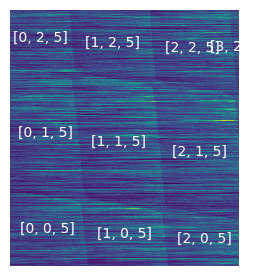

In [195]:
%matplotlib inline
u.plot_CSD(xexp, yexp, sensor_signalexp[:,:,0], polytopesexp)


In [8]:
plot

<Figure size 256x256 with 1 Axes>

In [7]:
ax

<Axes: >